<a href="https://colab.research.google.com/github/Harsha7738/Harsha7738/blob/main/Lab4%20Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as sk_conf_matrix

# Load the dataset
df = pd.read_csv('/mnt/DATASET.csv')

# Assume the last column is the target variable and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ensure class labels are zero-based
classes = np.unique(y)
class_mapping = {label: index for index, label in enumerate(classes)}
y_train_mapped = np.array([class_mapping[label] for label in y_train])
y_test_mapped = np.array([class_mapping[label] for label in y_test])
y_train_pred_mapped = np.array([class_mapping[label] for label in y_train_pred])
y_test_pred_mapped = np.array([class_mapping[label] for label in y_test_pred])

# Compute confusion matrices
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix

num_classes = len(classes)
train_conf_matrix = confusion_matrix(y_train_mapped, y_train_pred_mapped, num_classes)
test_conf_matrix = confusion_matrix(y_test_mapped, y_test_pred_mapped, num_classes)

print('Training Confusion Matrix:\n', train_conf_matrix)
print('Test Confusion Matrix:\n', test_conf_matrix)

# Compute performance metrics
def precision_recall_f1(conf_matrix):
    precisions = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recalls = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    return precisions, recalls, f1_scores

train_precisions, train_recalls, train_f1_scores = precision_recall_f1(train_conf_matrix)
test_precisions, test_recalls, test_f1_scores = precision_recall_f1(test_conf_matrix)

print('Training Precision:', train_precisions)
print('Training Recall:', train_recalls)
print('Training F1-Score:', train_f1_scores)

print('Test Precision:', test_precisions)
print('Test Recall:', test_recalls)
print('Test F1-Score:', test_f1_scores)

# Infer model learning outcome
def infer_learning_outcome(train_f1_scores, test_f1_scores):
    if np.all(test_f1_scores < train_f1_scores):
        return 'Possible Overfitting'
    elif np.all(test_f1_scores > train_f1_scores):
        return 'Possible Underfitting'
    else:
        return 'Regular Fit'

learning_outcome = infer_learning_outcome(train_f1_scores, test_f1_scores)
print('Model Learning Outcome:', learning_outcome)

Training Confusion Matrix:
 [[37  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 28]]
Test Confusion Matrix:
 [[ 8  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]
Training Precision: [1.         1.         1.         1.         1.                nan
 1.         1.                nan 0.78571429 0.68421053 1.
 1.                nan 1.                nan        nan 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Training Recall: [1.         1.         1.         1.         1.                nan
 1.         1.                nan 0.7857142

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-3-e7a5a49d16a8>:49: RuntimeWarning: invalid value encountered in divide
  precisions = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
<ipython-input-3-e7a5a49d16a8>:50: RuntimeWarning: invalid value encountered in divide
  recalls = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/mnt/DATASET.csv')

# Assume the last column is the target variable (price) and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_indices = y_true != 0
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"R^2 Score: {r2:.4f}")

# Analyze results
def analyze_results(mse, rmse, mape, r2):
    print("\nAnalysis:")
    if r2 < 0:
        print("The model performs worse than a horizontal line (mean value).")
    elif r2 > 0.8:
        print("The model explains a high proportion of variance and performs well.")
    elif r2 > 0.5:
        print("The model explains a moderate proportion of variance.")
    else:
        print("The model explains a low proportion of variance.")
    print(f"Lower MSE and RMSE indicate better model performance.")
    print(f"MAPE provides a percentage error; lower values indicate better prediction accuracy.")
    print(f"Compare R^2 with a baseline model to determine improvement.")

analyze_results(mse, rmse, mape, r2)

Mean Squared Error (MSE): 2285.9651
Root Mean Squared Error (RMSE): 47.8118
Mean Absolute Percentage Error (MAPE): 0.5702%
R^2 Score: -1.5449

Analysis:
The model performs worse than a horizontal line (mean value).
Lower MSE and RMSE indicate better model performance.
MAPE provides a percentage error; lower values indicate better prediction accuracy.
Compare R^2 with a baseline model to determine improvement.


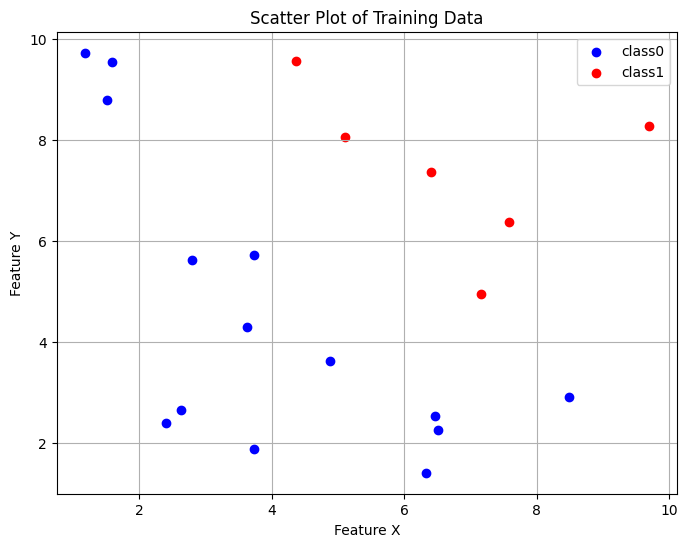

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 20 random data points for features X and Y
X = np.random.uniform(1, 10, size=(20, 2))

# Define class labels based on some arbitrary rule or clustering (e.g., based on X and Y values)
# Here we'll use a simple rule: if the sum of X and Y is greater than 12, class1 (Red), else class0 (Blue)
y = (X[:, 0] + X[:, 1] > 12).astype(int)

# Define class colors
colors = ['blue', 'red']

# Plotting
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                color=colors[class_label], label=f'class{class_label}')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

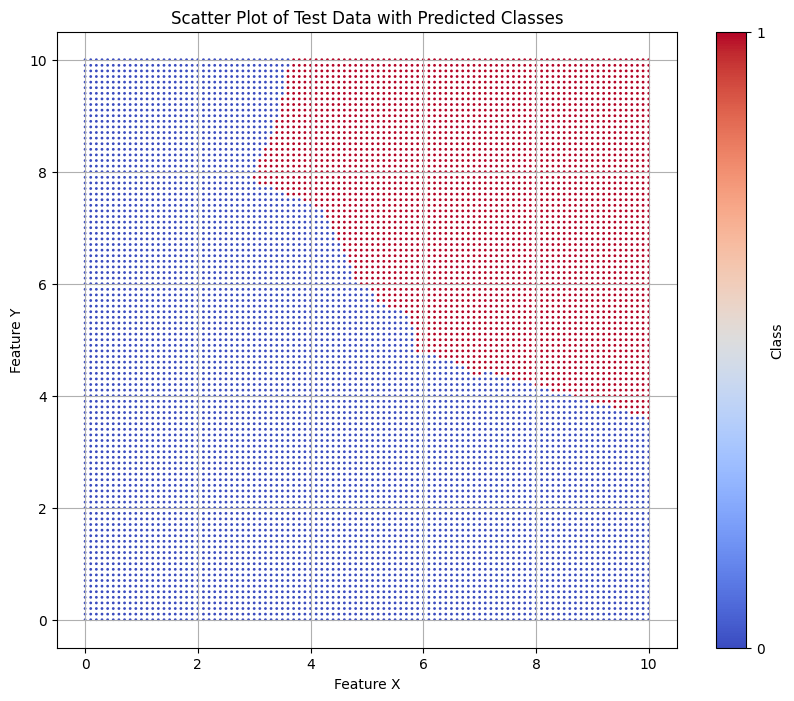

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.uniform(1, 10, size=(20, 2))
y_train = (X_train[:, 0] + X_train[:, 1] > 12).astype(int)

# Define and train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Generate test data
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_range for y in y_range])

# Predict class for test data
y_test_pred = knn.predict(X_test)

# Plotting
plt.figure(figsize=(10, 8))

# Create a scatter plot of the test points colored by the predicted class
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', s=1)
plt.colorbar(scatter, ticks=[0, 1], label='Class')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.grid(True)
plt.show()

<ipython-input-7-8571cd524453>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


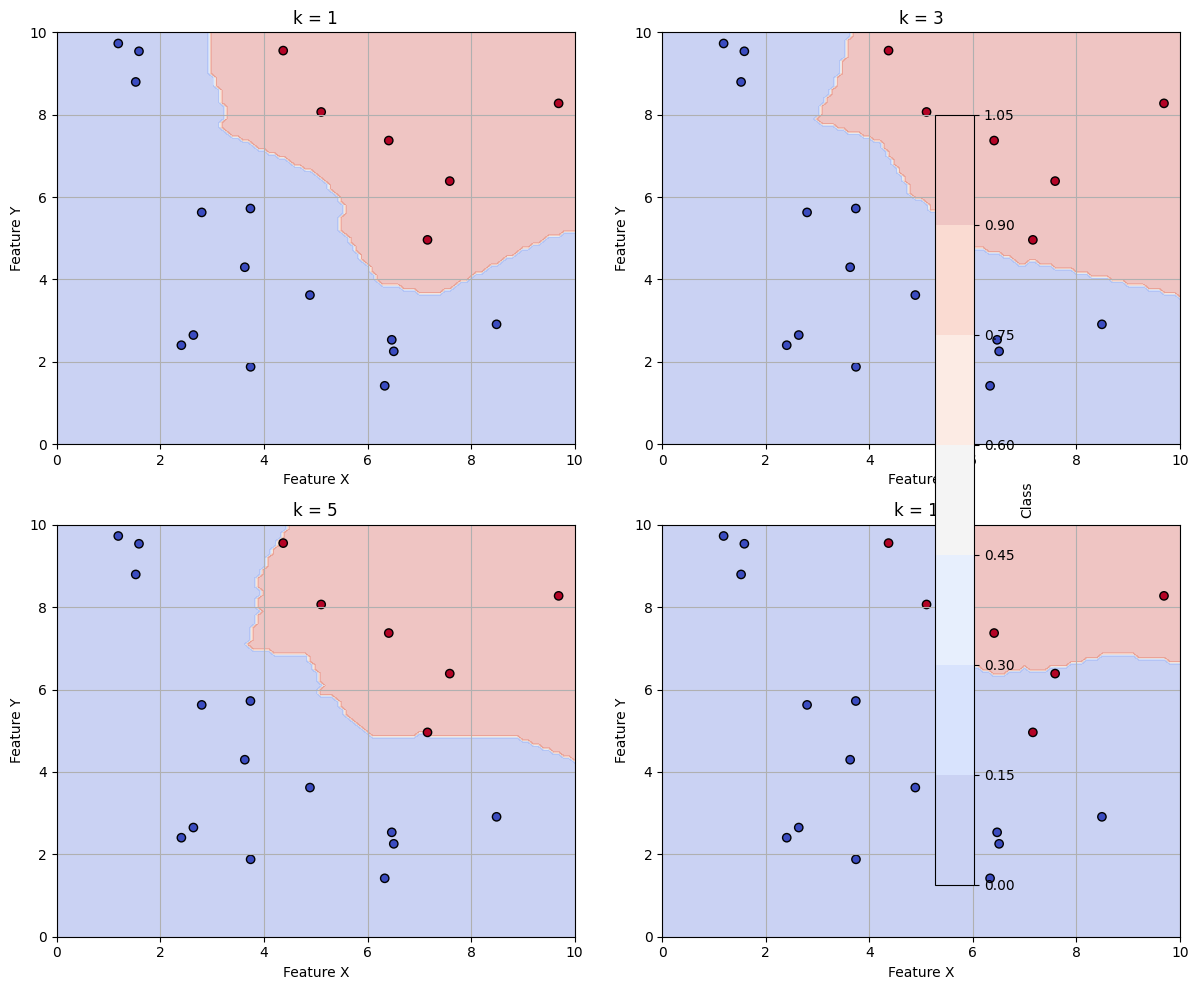

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.uniform(1, 10, size=(20, 2))
y_train = (X_train[:, 0] + X_train[:, 1] > 12).astype(int)

# Generate test data
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
X_test = np.array([[x, y] for x in x_range for y in y_range])

# Define k values to test
k_values = [1, 3, 5, 10]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, k in enumerate(k_values):
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Predict class for test data
    y_test_pred = knn.predict(X_test)
    # Plotting decision boundaries
    xx, yy = np.meshgrid(x_range, y_range)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i]
    contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

fig.colorbar(contour, ax=axes, orientation='vertical', label='Class')
plt.tight_layout()
plt.show()

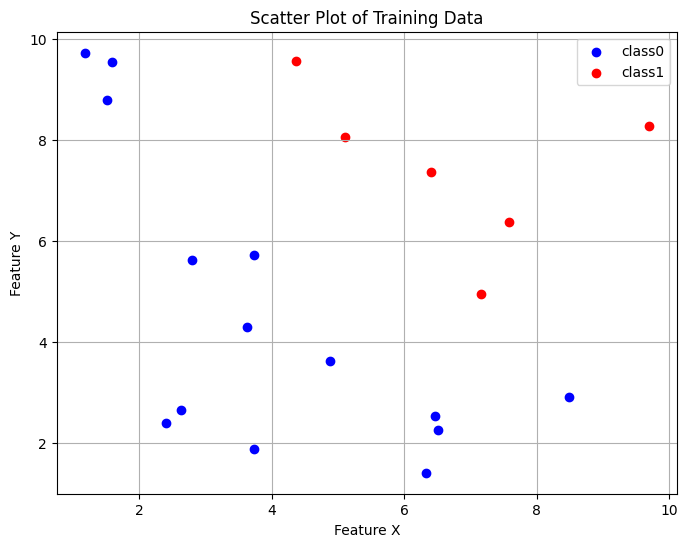

<ipython-input-9-8172ea33b42e>:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


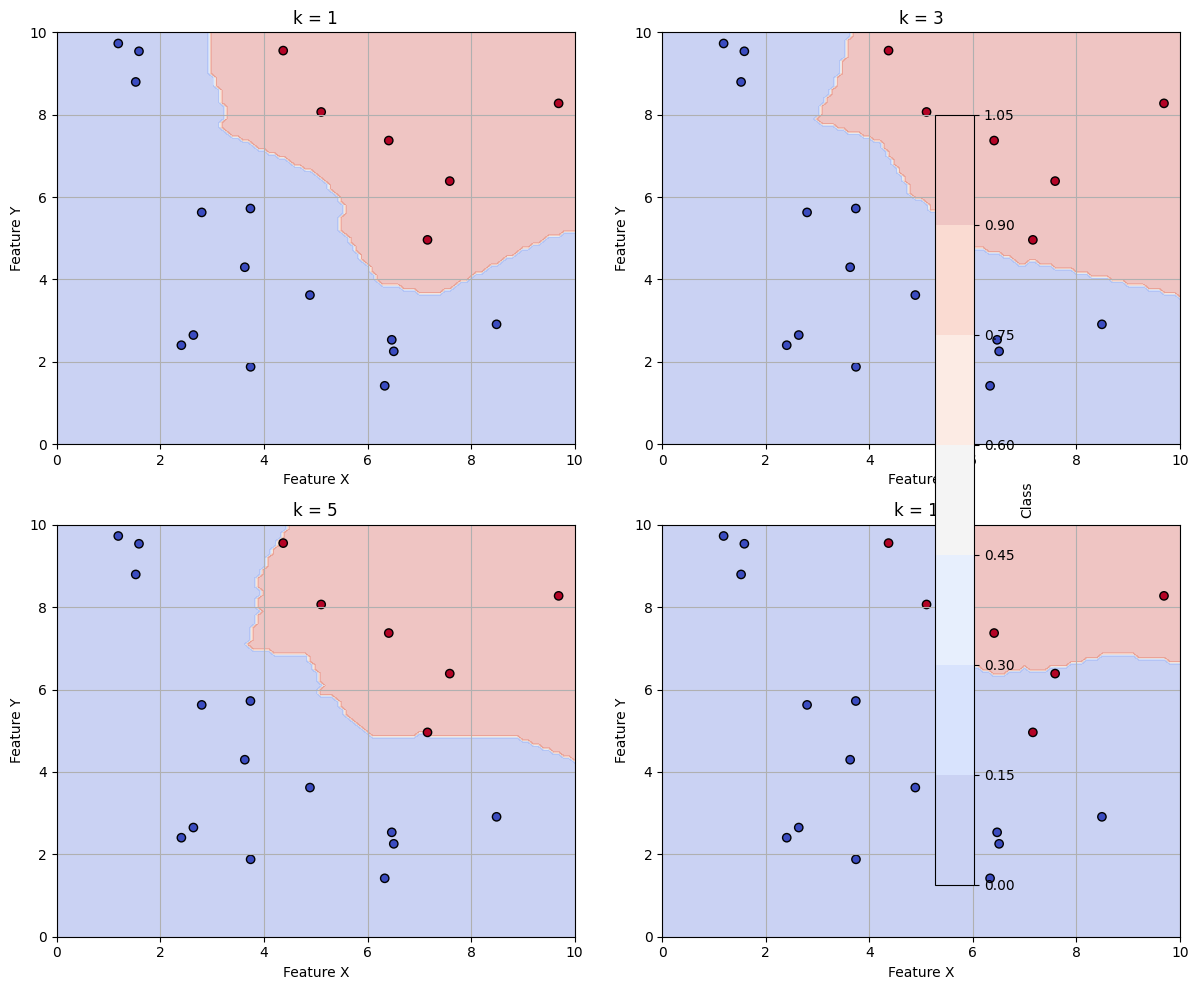

In [9]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility

np.random.seed(42)

# Generate training data

X_train = np.random.uniform(1, 10, size=(20, 2))

y_train = (X_train[:, 0] + X_train[:, 1] > 12).astype(int)

# Plot training data

plt.figure(figsize=(8, 6))

colors = ['blue', 'red']

for class_label in np.unique(y_train):

    plt.scatter(X_train[y_train == class_label, 0], X_train[y_train == class_label, 1],

                color=colors[class_label], label=f'class{class_label}')

plt.xlabel('Feature X')

plt.ylabel('Feature Y')

plt.title('Scatter Plot of Training Data')

plt.legend()

plt.grid(True)

plt.show()

# Generate test data

x_range = np.arange(0, 10.1, 0.1)

y_range = np.arange(0, 10.1, 0.1)

X_test = np.array([[x, y] for x in x_range for y in y_range])

# Define k values to test

k_values = [1, 3, 5, 10]

# Plot decision boundaries for different k values

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, k in enumerate(k_values):

    # Create and train the kNN classifier

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    # Predict class for test data

    y_test_pred = knn.predict(X_test)

    # Plotting decision boundaries

    xx, yy = np.meshgrid(x_range, y_range)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    ax = axes[i]

    contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')

    ax.set_title(f'k = {k}')

    ax.set_xlabel('Feature X')

    ax.set_ylabel('Feature Y')

    ax.grid(True)

fig.colorbar(contour, ax=axes, orientation='vertical', label='Class')

plt.tight_layout()

plt.show()

